# Рынок заведений общественного питания Москвы

<b> Проект: </b>
- Открытие кафе в Москве с официантами - роботами.

<b> Предоставленные данные: </b>
- Открытые данные о заведениях общественного питания Москвы.

<b> Задача: </b>
- Исследование рынка и подготовка рекомендаций о виде заведения, количестве посадочных мест, а также районе расположения. Формирование прогнозов касательно развития сети.

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import seaborn as sns
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

/var/folders/_r/kc72tvn91yj1l4rlghqgttm40000gn/T/ipykernel_42552/3403004632.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [2]:
rest_data = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_08/rest_data.csv')
rest_data.sample(10)
rest_data.info()
rest_data.describe()

,id,object_name,chain,object_type,address,number
5965,107884,Кафе «Восточные вечера»,нет,кафе,"город Москва, 2-й квартал Капотня, дом 37",35
3610,22031,Чайковский,нет,кафе,"город Москва, Тверская улица, дом 31/4, строен...",98
4154,29004,ШКОЛА 514 «КДП»,нет,столовая,"город Москва, Коломенская набережная, дом 16",300
10214,169676,Шоколадница,да,кафе,"город Москва, Береговой проезд, дом 5А, корпус 7",56
2753,22447,Щербет,нет,ресторан,"город Москва, Мясницкая улица, дом 17, строение 1",80
11332,190390,Пицца ДЖЭТ,нет,магазин (отдел кулинарии),"город Москва, бульвар Адмирала Ушакова, дом 18Б",0
6636,19678,Баскин Роббинс,да,предприятие быстрого обслуживания,"город Москва, Рублёвское шоссе, дом 62",46
1841,145091,Даблби,нет,кафе,"город Москва, Большая Татарская улица, дом 7",30
11179,183145,"Тайское мороженое, лимонады",нет,магазин (отдел кулинарии),"город Москва, Открытое шоссе, дом 9, строение 14А",4
6361,29485,СТОЛОВАЯ ДЛЯ СОТРУДНИКОВ НИЦ ИМ. И.А.СЕЧЕНОВА,нет,столовая,"город Москва, Трубецкая улица, дом 8",60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [3]:
rest_data.object_type.value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

### Вывод
Библиотеки загружены, с данными ознакомлены, можно переходить к предобработке.

## Предобработка и исследование данных

In [4]:
# Все названия заведений приведем к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [5]:
# Создадим словарь вариаций названий крупных сетевых заведений
name_dict = {'кафе «kfc»' : 'kfc', 'ресторан «kfc»' : 'kfc',
       'кафе «шоколадница»' : 'шоколадница',
       'mcdonalds' : 'макдоналдс', 'ресторан «макдоналдс»' : 'макдоналдс', 'кафе «макдоналдс»' : 'макдоналдс',
       'ресторан «тануки»' : 'тануки',
       'суши вок' : 'суши wok',
       'сабвей': 'subway', 'кафе «subway»' : 'subway',
       'пиццерия «папа джонс»' : 'папа джонс',
       'кафе «теремок»' : 'теремок'}
# Приведем названия к единому образцу, воспользовавшись словарем
rest_data['object_name'] = rest_data['object_name'].replace(name_dict, regex=True) 

In [6]:
# Избавимся от небольшого количества явных дубликатов
rest_data.drop_duplicates(
    subset=['object_name', 'object_type', 'address', 'number']).reset_index(drop=True)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15276,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15277,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15278,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15279,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


### Вывод
В предобработке мы частично привели названия заведений к общему порядку. Для составления словаря названий данные прорабатывались вручную, в связи с чем к одному названию были приведены только крупные сети, которые были "на виду". Несмотря на разные идентификаторы, 85 заведений схожих по названию, типу, адресу и количеству мест, были удалены. 

## Исследовательский анализ данных (EDA)

### Cоотношение видов объектов общественного питания по количеству

In [7]:
# Сгруппируем данные по типу заведения, посчитаем их количество и построим график
type_cnt = rest_data.groupby(
    'object_type').agg({'id' : 'count'}).sort_values(by='id', ascending=False).reset_index()
type_cnt.columns = ['Тип объекта', 'Количество']
fig = px.bar(type_cnt, x='Тип объекта', y='Количество', title='Соотношение видов объектов питания')
fig.show()

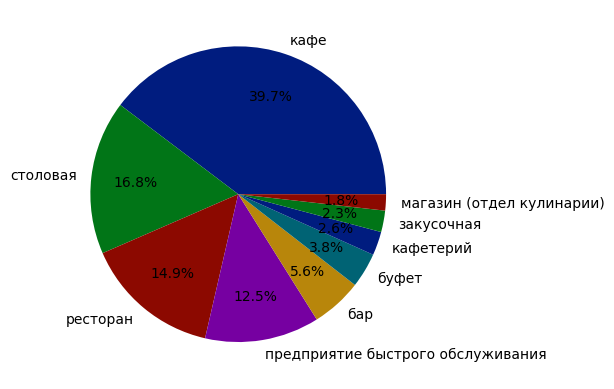

In [8]:
plt.pie(type_cnt['Количество'], 
        labels = type_cnt['Тип объекта'], 
        autopct='%.1f%%', 
        radius= 1, pctdistance = 0.7)
plt.show();

#### Вывод
Количество кафе значительно превалирует над остальными типами заведений с показателем - 6099 (39,7%). Количество столовых, ресторанов и предприятий быстрого обслуживания значительно ниже количества кафе и находится на уровне средних значений графика - от 2587 до 1923. Меньше всего среди рассматриваемых типов заведений - магазинов с отделами кулинарии - 273 (1,8%). Можно предположить, что кафе больше всего из-за универсальности его понятия, в той или иной мере включающего в себя понятия остальных заведений.

### Cоотношение сетевых и несетевых заведений по их количеству

In [9]:
# Сгруппируем данные по типу заведения и сетевому статусу, посчитаем их количество и построим график
chain_cnt = rest_data.groupby(
    ['chain','object_type']).agg(
    {'id' : 'count'}).sort_values(
    by='id', ascending=False).reset_index()
chain_cnt.columns = ['Сеть', 'Тип объекта', 'Количество']
fig = px.bar(chain_cnt, x="Тип объекта", y="Количество", color="Сеть", 
             title="Соотношение сетевых и несетевых заведений")

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = chain_cnt['Тип объекта'],
        ticktext = ["<br>".join(label.split()) for label in chain_cnt['Тип объекта']]
    )
)

fig.show()

#### Вывод
На графике можно заметить, что сетевых заведений значительно меньше, а столовые, буфеты и бары в основном вообще не имеют сетевых заведений. Кафе, рестораны и предприятия быстрого обслуживания имеют больше всего сетей заведений. Стоит посмотреть на относительные величины.

In [11]:
# Посчитаем отношение несетевых к сетевым заведениям
chain_ratio = chain_cnt.pivot_table(index='Тип объекта', columns='Сеть', values='Количество').reset_index()
chain_ratio['Соотношение'] = chain_ratio['да'] / chain_ratio['нет']
chain_ratio = chain_ratio.sort_values(by='Соотношение', ascending=False)
fig = px.bar(chain_ratio, x="Тип объекта", y="Соотношение",
             title="Соотношение сетевых и несетевых заведений")
fig.show();

#### Вывод
В данном случае мы видим, что относительные величины распределились иначе. Предприятия быстрого обслуживания имеют самое большое количество сетевых заведений по отношению к несетевым, когда столовые наоборот, имеют только индивидуальные заведения.

### Распределение посадочных мест в сетевых заведениях

In [12]:
# Отфильтруем сетевые заведения и построим график распределения количества посадочных мест
chain_object = rest_data.query('chain == "да"')
fig = px.histogram(chain_object, x="number")
fig.update_layout(
                  title="Распределение количества мест в сетевых заведениях",
                  xaxis_title="Количество посадочных мест",
                  yaxis_title="Количество заведений")
fig.show();

#### Комментарий
Большее количество посадочных мест среди сетевых заведений располагается в диапазоне от 0 до 50.

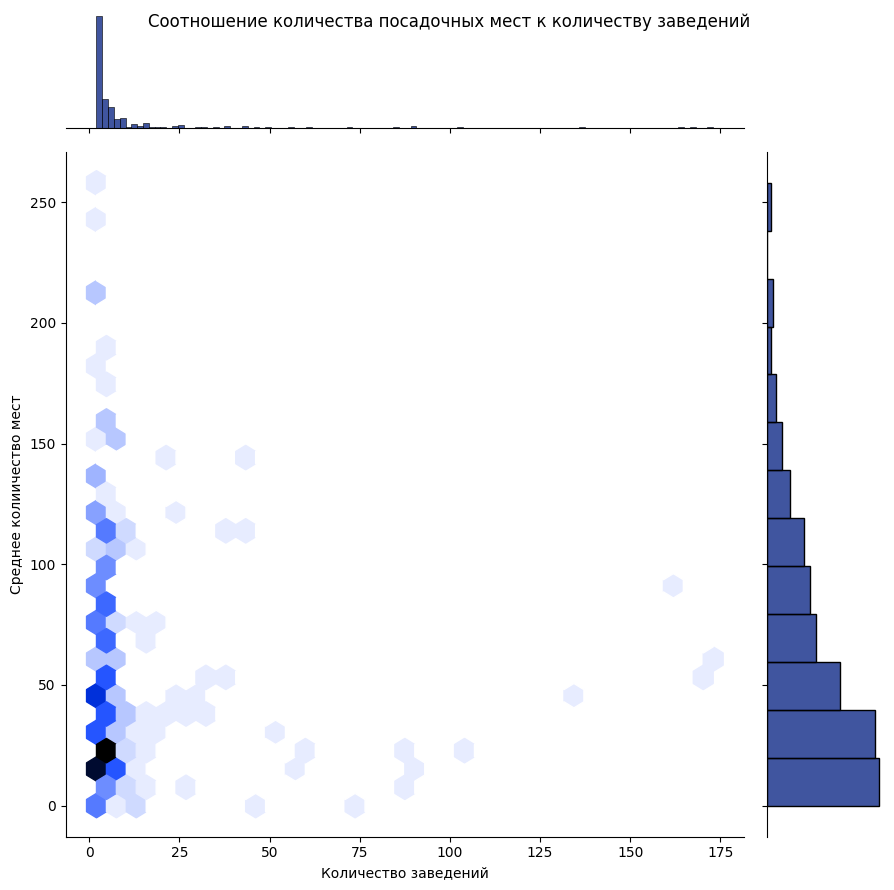

In [13]:
number_mean = chain_object.groupby('object_name').agg({'id':'count', 'number':'mean'})
number_mean['number'] = number_mean['number'].astype(int)
number_mean_without_1 = number_mean.query('id > 1')
number_mean_without_1.columns = ['Количество заведений', 'Среднее колиичество мест']
fig = sns.jointplot(x='Количество заведений', 
              y='Среднее колиичество мест', 
              data=number_mean_without_1, 
              height = 9, kind="hex")
fig.fig.suptitle('Соотношение количества посадочных мест к количеству заведений');

#### Вывод
Сети с большим количеством заведений, как правило не имеют большого количества посадочных мест. В сетевых заведениях с количеством объектов не более 10 имеются заведения с большим количеством посадочных мест. Однако бОльшая часть сетевых заведений попадает в категорию с небольшим количеством объектов и посадочных мест.

### Среднее количество посадочных мест по видам заведений

In [14]:
# Сгруппируем данные по типам и вычислим среднее количество мест для каждого, после чего построим график
mean_seats = rest_data.groupby('object_type')['number'].agg(mean_seats='mean').reset_index()
mean_seats.columns = ['Тип объекта', 'Количество мест']
mean_seats = mean_seats.sort_values(by='Количество мест', ascending=False)
fig = px.bar(mean_seats, x="Тип объекта", y="Количество мест",
             title="Среднее количество посадочных мест")
fig.show();

#### Вывод
В среднем самым большим количеством посадочных мест располагают столовые и рестораны - 130 и 97 соответственно. Для столовых это необходимо, так как приходится обслуживать большое количество клиентов одновременно, а в ресторанах это объясняется желанием клиентов провести побольше времени и чтобы не обидеть никого из клиентов, появляется необходимость в увеличении посадочных мест.
Меньше всего посадочных мест в кафетериях, закусочных и отделах кулинарии, где клиенты находятся недолго, а зачастую и забирают еду с собой.

### Tоп-10 улиц по количеству объектов общественного питания

In [15]:
# Создадим словарь наименований адресов объектов
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']
# С помощью регулярных выражений удалим все лишнее и оставим в столбце street только названия улиц
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
rest_data['street'] = rest_data['address'].str.extract(str_pat, flags=0)
rest_data.sample(5)

,id,object_name,chain,object_type,address,number,street
4523,23302,буфет при гоу сош №1114,нет,буфет,"город Москва, Филёвский бульвар, дом 13, корпус 2",120,Филёвский бульвар
11878,173678,суши wok,да,кафе,"город Москва, Сельскохозяйственная улица, дом ...",20,Сельскохозяйственная улица
12366,202138,cofix,да,кафе,"город Москва, Пятницкая улица, дом 8",10,Пятницкая улица
13832,206974,дублинец,нет,ресторан,"город Москва, Никольская улица, дом 10",115,Никольская улица
4343,138012,столовая при школе № 2107,нет,столовая,"город Москва, Большая Переяславская улица, дом...",130,Большая Переяславская улица


In [16]:
import re

try:
    print(re.search(str_pat, "город Москва, проспект Мира").group(1))
except AttributeError as e:
    print("Не нашлось :( Хотя вот же оно.", e)

try:
    print(re.search(str_pat, "город Москва, проспект Мира,").group(1))
except AttributeError as e:
    print("Это не выполнится")


Не нашлось :( Хотя вот же оно. 'NoneType' object has no attribute 'group'
проспект Мира


In [17]:
# Сформируем таблицу из десяти улиц с самым большим количетсвом заведений
top10_street = rest_data.groupby('street').agg(
    {'id' : 'count'}).sort_values(
    by='id',ascending=False).head(10).reset_index()
top10_street.columns = ['Улица', 'Количество заведений']
print('Топ-10 улиц с самым большим количеством заведений')
top10_street

Топ-10 улиц с самым большим количеством заведений


,Улица,Количество заведений
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


#### Комментарий
Чем больше улица, тем больше на ней заведений, поэтому в нашем рейтинге в основном шоссе и проспекты. Скорее всего данный факт малоинформативен, так как данные сильно искажаются размерами улиц.

### Tоп-10 районов по количеству объектов общественного питания

In [18]:
# Импортируем внешние данные с градацией улиц по районам
from io import BytesIO
import requests
spreadsheet_id = '19DwsyPT12C1C9p0F1SeMUkYV-6AEu6132Z73cocBlk8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
area_data = pd.read_csv(BytesIO(r.content))
area_data

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [19]:
# Соединим таблицы по названию улицы
rest_data = pd.merge(rest_data, area_data, left_on='street', right_on='streetname')

#### Комментарий
Объединение значительно увеличило размер таблицы, так как одна улица может располагать в нескольких районах, в связи с чем данные о заведениях продублировались в каждый из районов, по которому проходит улица.

In [20]:
# Сгруппируем данные по названиям районов
top10_area = rest_data.groupby('area').agg(
    {'id' : 'nunique'}).sort_values(
    by='id', ascending=False).head(10).reset_index()
top10_area.columns = ['Район', 'Количество заведений']
print('Топ-10 районов с самым большим количеством заведений')
top10_area[['Район']]

Топ-10 районов с самым большим количеством заведений


,Район
0,Тверской район
1,Пресненский район
2,Басманный район
3,Даниловский район
4,Мещанский район
5,Донской район
6,Таганский район
7,Обручевский район
8,Район Замоскворечье
9,Район Гагаринский


In [21]:
# Создадим список из улиц, с большим количеством заведений
top10_street_list = pd.Series(top10_street['Улица'])
# Отфильтруем таблицу по полученному списку
street_with_many_obj = rest_data.query('street in @top10_street_list')

print('Районы, по которым проходят Топ-10 улиц')
print('_________________________________________')
street_with_many_obj['area'].unique()

Районы, по которым проходят Топ-10 улиц
_________________________________________


array(['Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Раменки',
       'Район Тропарево-Никулино', 'Район Гагаринский',
       'Ломоносовский район', 'Район Дорогомилово',
       'Район Фили-Давыдково', 'Район Москворечье-Сабурово',
       'Район Орехово-Борисово Южное', 'Район Орехово-Борисово Северное',
       'Район Аэропорт', 'Район Беговой', 'Хорошевский район',
       'Район Сокол', 'Обручевский район', 'Район Теплый Стан',
       'Район Якиманка', 'Алексеевский район', 'Ярославский Район',
       'Район Марьина роща', 'Останкинский район', 'Район Ростокино',
       'Район Свиблово', 'Мещанский район', 'Академический район',
       'Район Черемушки', 'Район Ясенево', 'Район Коньково',
       'Пресненский район'], dtype=object)

#### Вывод
Несмотря на то, что группировка по районам проводилась в таблице, содержащей большое количество дубликатов, копирование заведений производилось пропорционально, что позволило составить Топ-10 районов с самым большим количеством заведений.

Как можно было предположить, заведения общепита предпочитают открывать ближе к центру, почему и 6 районов рейтинга расположены в центральном округе. Оставшиеся 4 района, расположены вблизи друг от друга, находятся далеко не на окраинах города, а их инфраструктура включает в себя большое количество учебных заведений, общежитий для учащихся, торговых центров и офисов, что также может объяснить их попадание в десятку лучших.

### Районы, где присутствуют улицы с одним объектом питания

In [22]:
# Сгруппируем данные, по улицам и районам, а затем отфильтруем, оставив улицы с 1 заведением
street_with_1_obj = rest_data.groupby(['street', 'area']).agg({'id' : 'count'}).query('id == 1').reset_index()
len(street_with_1_obj)

564

#### Комментарий
В Москве есть 564 улицы на которых расположено одно завдение общепита.

In [23]:
# Сгруппируем полученые данные по районам
street_with_1_obj.columns = ['Улица', 'Район', 'Количество улиц']
street_with_1_obj_cnt = street_with_1_obj.groupby('Район').agg({'Количество улиц' : 'count'}).sort_values(
    by='Количество улиц', ascending=False).head(10).reset_index()
print('Районы, где присутствуют улицы с одним объектом')
street_with_1_obj_cnt

Районы, где присутствуют улицы с одним объектом


,Район,Количество улиц
0,Таганский район,27
1,Район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,19
5,Район Марьина роща,18
6,Мещанский район,17
7,Район Арбат,17
8,Район Замоскворечье,14
9,Район Лефортово,12


#### Вывод
Таким образом, опять в лидерах районы ЦАО, теперь их 7 в рейтинге. Повышенное количество заведений вкупе с наличием большого числа маленьких улиц, переулков и всевозможных тупиков, позволяют районам Центрального округа в очередной раз попасть в рейтинг "лучших".

### Распределение количества посадочных мест для Топ-10 улиц

In [24]:
# Отфильтруем таблицу по полученному списку
street_with_many_obj = rest_data.query('street in @top10_street_list')
# Избавимся от дубликатов, получившихся ранее из-за слияния таблиц
street_with_many_obj = street_with_many_obj.drop_duplicates(
    subset=['id']).reset_index(drop=True)

In [25]:
fig = px.histogram(street_with_many_obj, x="number")
fig.update_layout(
                  title="Распределение количества мест для улиц с большим количеством заведений",
                  xaxis_title="Количество посадочных мест",
                  yaxis_title="Количество заведений",
                  margin=dict(l=0, r=0, t=80, b=0))
fig.show();

#### Вывод
Самое большое количество заведений имеет до 10ти посадочных мест, а основная часть исследуемых заведений не превышает 90 посадочных мест. Так как основная часть объектов располагается в центральной части города, где аренда помещения категорически высокая, владельцам заведений в основном приходится выжимать максимум из небольшой площади, откуда и небольшое количество посадочных мест. Так же график посадочных мест сильно "оттягивают" к минимуму заведения, неимеющие посадочных мест совсем. Рынки и гастрономические лавки, фудкорты и рестораны с едой на вынос строят свой бизнес в основном на производстве еды, а не на обслуживании большого количества столиков.

## Общий вывод и рекомендации бизнесу

Подводя итог исследования, можно сделать вывод о факторах, которые позитивно отразились бы на бизнесе в сфере общественного питания. Учитывая, что у нас отсутствовали данные о прибыльности или посещаемости тех или иных заведений, прогнозы на успешность бизнеса будем строить отталкиваясь от велечин показателей, рассматривая самые распротстраненные, как показатели успеха. Таким образом можно выделить следующие факторы:

   - Заведение должно быть формата кафе, ресторана или предприятия быстрого обслуживания (столовые не рассматриваем из-за специфики расположения и обслуживания в данных заведениях).
   - Открывая предприятие быстрого обслуживания, возможно рассмотреть вариант запуска сети таких заведений. Для кафе и ресторанов этот фактор незначителен.
   - Для сетей с большим количеством заведений характерно наличие небольшого количества посадочных мест (от 0 до 50). Открывая одиночное заведение или небольшую сеть стоит рассмотреть вариант с наличием бОльшего количества мест (от 100).
   - Исходя из специфики заведений, для столовых и ресторанов характерно наличие большого количества посадочных мест (100 - 130). Для буфетов, баров и кафе характерно среднее количество мест (около 50), оставшиеся заведения в среднем имеют не больше 20 посадочных мест.
   - Большая часть заведений располагается в центральной части города. Однако фактор конкуренции здесь будет значительно выше. Давая рекомендацию по данному вопросу, чтобы сохранить баланс между близостью к историческому центру для завлечения туристов, а также местными жителями и работниками района, сразу не вступая в борьбу с крупными сетями и раскрученными заведениями, расположенными в центре, предпочтительно выбирать густонаселенные, соседствующие с центром районы, с развитой транспортной и офисной инфраструктурой.
   - Не опасаясь конкуренции и высокой арендной платы, если заведение открывается в одном из центральных районов, возможно стоит придерживаться формата здешних заведений и не увеличивать количество посадочных мест больше 50.
   
Как было указано ранее, приведенные рекомендации - лишь результат исследования небольшого количества данных. К сожалению исследовать поведение клиентов заведений общепита, которых обслуживали роботы, мы не имели возможности из-за инновационности этого проекта. Отвечая на вопрос, привлекут ли роботы клиентов, можно предположить - да, а личный опыт и оценка объективного мира подсказывают, что вкусная еда и демократичные цены, сделают клиентов лояльными, а бизнес прибыльным.